In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam

Đọc dữ liệu từ file

In [ ]:
import pathlib
data_dir = pathlib.Path("data")

count=0
array_flowers_length= []
array_flowers=[]
for item in data_dir.iterdir():
    length_item = len(list(item.glob('*')))
    name_item= str(item).replace("data\\","")                
    print(name_item + ": ", end="")
    print((length_item), end=" Flowers")
    print()
    array_flowers_length.append(count+ length_item)
    
    count+= length_item

image_count = len(list(data_dir.glob('*/*')))
print("Tổng số hoa: "+ str(image_count))


data/hoa_Dao: 102 Flowers
data/hoa_Hong: 182 Flowers
data/hoa_Huong_duong: 192 Flowers
data/hoa_Chi_van_mon: 201 Flowers
data/hoa_Da_quy: 144 Flowers
data/hoa_Mac_co: 106 Flowers
data/hoa_Sung: 200 Flowers
data/hoa_Dua_can: 140 Flowers
data/hoa_Hong_mon: 202 Flowers
data/hoa_Su: 171 Flowers
data/hoa_Mai: 138 Flowers
data/hoa_Cuc: 111 Flowers
data/hoa_Bim_bip: 205 Flowers
data/hoa_Thien_dieu: 154 Flowers
data/hoa_Ly: 178 Flowers
data/hoa_Trang_nguyen: 173 Flowers
data/hoa_Bo_cong_anh: 38 Flowers
data/hoa_Bi_ngan: 91 Flowers
data/hoa_Cuc_mat_bo: 211 Flowers
data/hoa_Rieng_tia: 132 Flowers
data/hoa_Bo_cau: 144 Flowers
data/hoa_Giay: 114 Flowers
data/hoa_Dam_but: 319 Flowers
data/hoa_Cam_tu_cau: 125 Flowers
Tổng số hoa: 3773


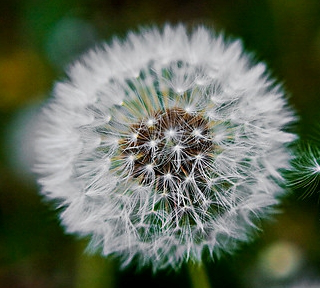

In [ ]:
bo_cong_anh = list(data_dir.glob('hoa_Bo_cong_anh/*'))
PIL.Image.open(str(bo_cong_anh[1]))

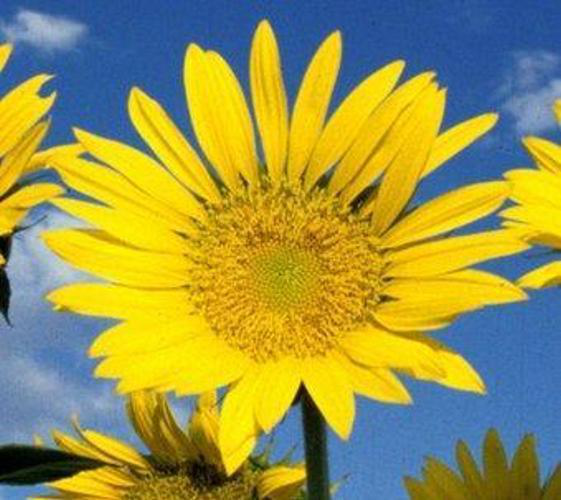

In [ ]:
hoa_huong_duong = list(data_dir.glob('hoa_Huong_duong/*'))
PIL.Image.open(str(hoa_huong_duong[100]))

In [ ]:
batch_size = 32
img_height = 256
img_width = 256

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 3771 files belonging to 24 classes.
Using 3017 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3771 files belonging to 24 classes.
Using 754 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)
class_names=["Hoa Bỉ ngạn","Hoa Bìm bịp","Hoa Bồ câu","Hoa Bồ công anh","Hoa Cẩm tú cầu","Hoa Chi vân môn","Hoa Cúc","Hoa Cúc mắt bò","Hoa Dã quỳ","Hoa Dâm bụt","Hoa Đào","Hoa Dừa cạn","Hoa Giấy","Hoa Hồng","Hoa Hồng môn","Hoa Hướng dương","Hoa Ly","Hoa Mắc cỡ","Hoa Mai","Hoa Riềng tía","Hoa Sứ","Hoa Súng","Hoa Thiên điểu","Hoa Trạng Nguyên"]


['hoa_Bi_ngan', 'hoa_Bim_bip', 'hoa_Bo_cau', 'hoa_Bo_cong_anh', 'hoa_Cam_tu_cau', 'hoa_Chi_van_mon', 'hoa_Cuc', 'hoa_Cuc_mat_bo', 'hoa_Da_quy', 'hoa_Dam_but', 'hoa_Dao', 'hoa_Dua_can', 'hoa_Giay', 'hoa_Hong', 'hoa_Hong_mon', 'hoa_Huong_duong', 'hoa_Ly', 'hoa_Mac_co', 'hoa_Mai', 'hoa_Rieng_tia', 'hoa_Su', 'hoa_Sung', 'hoa_Thien_dieu', 'hoa_Trang_nguyen']


2022-01-19 14:21:00.580241: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-19 14:21:00.580856: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


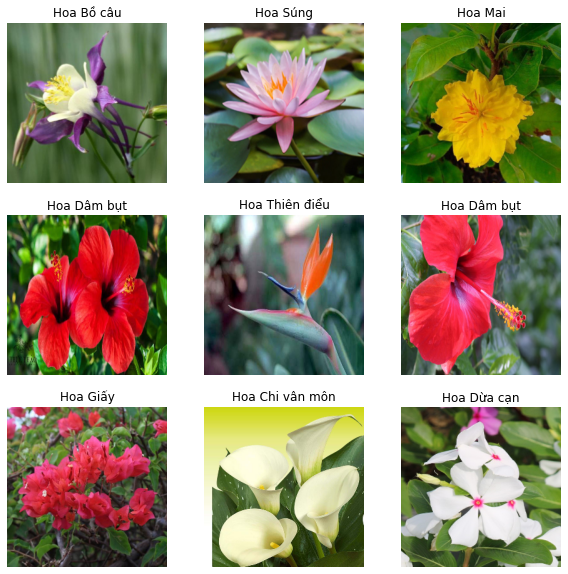

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
95/95 [==============================] - 38s 394ms/step - loss: 2.6796 - accuracy: 0.2377 - val_loss: 2.0214 - val_accuracy: 0.3568
Epoch 2/15
95/95 [==============================] - 39s 411ms/step - loss: 1.4934 - accuracy: 0.5469 - val_loss: 1.6364 - val_accuracy: 0.4947
Epoch 3/15
95/95 [==============================] - 39s 407ms/step - loss: 0.7164 - accuracy: 0.7799 - val_loss: 1.5781 - val_accuracy: 0.5451
Epoch 4/15
95/95 [==============================] - 39s 412ms/step - loss: 0.2467 - accuracy: 0.9307 - val_loss: 1.9338 - val_accuracy: 0.5570
Epoch 5/15
95/95 [==============================] - 38s 403ms/step - loss: 0.0899 - accuracy: 0.9738 - val_loss: 2.1768 - val_accuracy: 0.5756
Epoch 6/15
95/95 [==============================] - 39s 409ms/step - loss: 0.0255 - accuracy: 0.9940 - val_loss: 2.4034 - val_accuracy: 0.6048
Epoch 7/15
95/95 [==============================] - 40s 425ms/step - loss: 0.0042 - accuracy: 0.9997 - val_loss: 2.5216 - val_accuracy: 0.6034

In [ ]:
def visualize_result(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

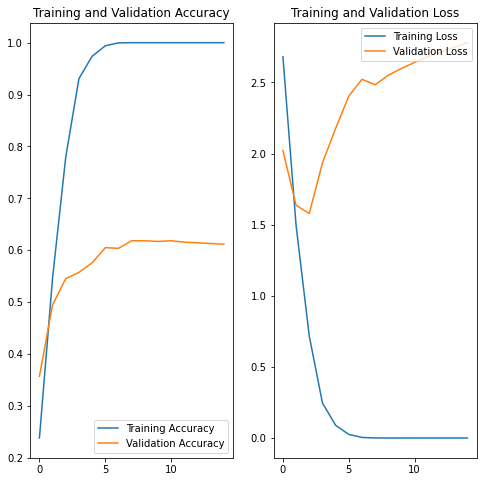

In [ ]:
visualize_result(history)

In [ ]:
model.save('model.h5')

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
  ]
)

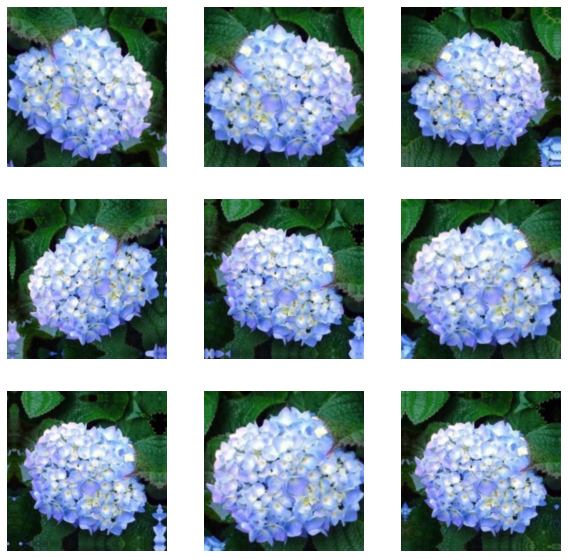

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model_aug = keras.Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model_aug.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 50
history = model_aug.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
95/95 [==============================] - 50s 526ms/step - loss: 2.3100 - accuracy: 0.2950 - val_loss: 1.8956 - val_accuracy: 0.3912
Epoch 2/50
95/95 [==============================] - 49s 517ms/step - loss: 1.6856 - accuracy: 0.4587 - val_loss: 1.6058 - val_accuracy: 0.4920
Epoch 3/50
95/95 [==============================] - 48s 509ms/step - loss: 1.3910 - accuracy: 0.5512 - val_loss: 1.3682 - val_accuracy: 0.5610
Epoch 4/50
95/95 [==============================] - 49s 512ms/step - loss: 1.1823 - accuracy: 0.6215 - val_loss: 1.3599 - val_accuracy: 0.5716
Epoch 5/50
95/95 [==============================] - 49s 512ms/step - loss: 1.0424 - accuracy: 0.6715 - val_loss: 1.1347 - val_accuracy: 0.6472
Epoch 6/50
95/95 [==============================] - 49s 513ms/step - loss: 0.8971 - accuracy: 0.7010 - val_loss: 1.1265 - val_accuracy: 0.6446
Epoch 7/50
95/95 [==============================] - 69s 729ms/step - loss: 0.7943 - accuracy: 0.7498 - val_loss: 1.0033 - val_accuracy: 0.7003

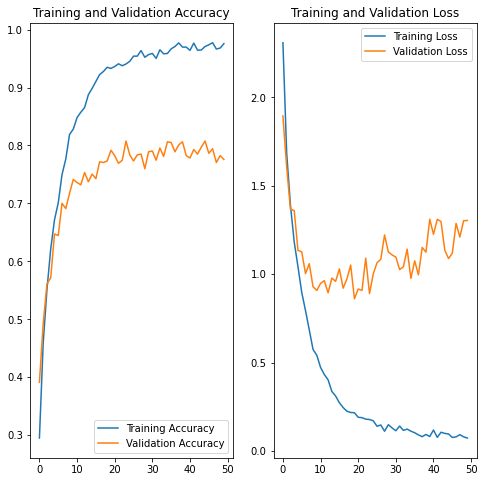

In [ ]:
visualize_result(history)

In [ ]:
model_aug.save('model_aug.h5')

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(img_height,img_width,3),
                   pooling='avg',classes= num_classes,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(24, activation='sigmoid'))

In [ ]:
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_5 (Dense)              (None, 24)                12312     
Total params: 24,649,112
Trainable params: 1,061,400
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 15
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
95/95 [==============================] - 169s 2s/step - loss: 0.5657 - accuracy: 0.8389 - val_loss: 0.2782 - val_accuracy: 0.9151
Epoch 2/15
95/95 [==============================] - 257s 3s/step - loss: 0.0981 - accuracy: 0.9728 - val_loss: 0.1950 - val_accuracy: 0.9363
Epoch 3/15
95/95 [==============================] - 197s 2s/step - loss: 0.0497 - accuracy: 0.9841 - val_loss: 0.1916 - val_accuracy: 0.9416
Epoch 4/15
95/95 [==============================] - 272s 3s/step - loss: 0.0367 - accuracy: 0.9897 - val_loss: 0.1254 - val_accuracy: 0.9602
Epoch 5/15
95/95 [==============================] - 198s 2s/step - loss: 0.0219 - accuracy: 0.9940 - val_loss: 0.2081 - val_accuracy: 0.9377
Epoch 6/15
95/95 [==============================] - 199s 2s/step - loss: 0.0085 - accuracy: 0.9987 - val_loss: 0.1380 - val_accuracy: 0.9615
Epoch 7/15
95/95 [==============================] - 195s 2s/step - loss: 0.0029 - accuracy: 0.9997 - val_loss: 0.1609 - val_accuracy: 0.9562
Epoch 8/15
95

In [ ]:
visualize_result(history)

In [ ]:
resnet_model.save('resnet_model.h5')

In [2]:
import cv2
import random

def  predict_one_img(img):
    predict_img= img

    image=cv2.imread(str(predict_img))
    image_resized= cv2.resize(image, (180, 180))
    image=np.expand_dims(image_resized,axis=0)
    pred=test_model.predict(image)

    output_class=class_names[np.argmax(pred)]

    return "Model Predicted: " + output_class

In [4]:
datatest_dir = pathlib.Path("data/hoa_Cuc")


for item in datatest_dir.iterdir():
    print(predict_one_img(item))

NameError: ignored